### Breiman - 2Dplanes - Regression - Incremental

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x1 = np.random.choice([-1,1], size=20000)

In [3]:
x2 = np.random.randint(-1,2, size=20000)
x3 = np.random.randint(-1,2, size=20000)
x4 = np.random.randint(-1,2, size=20000)
x5 = np.random.randint(-1,2, size=20000)
x6 = np.random.randint(-1,2, size=20000)
x7 = np.random.randint(-1,2, size=20000)
x8 = np.random.randint(-1,2, size=20000)
x9 = np.random.randint(-1,2, size=20000)
x10 = np.random.randint(-1,2, size=20000)

#### Drifts

Drift starts @ [5000]: x4, x5, x6, x7 now np.random.randint([-1-i,2+i]), i += 1 after every 2000 observations. Stop when i = 5.


In [4]:
#Create drift
j = 0
for i in range(1,6):
    x4[5000+j:7000+j]=np.random.randint(-1-i,2+i,2000)
    x5[5000+j:7000+j]=np.random.randint(-1-i,2+i,2000)
    x6[5000+j:7000+j]=np.random.randint(-1-i,2+i,2000)
    x7[5000+j:7000+j]=np.random.randint(-1-i,2+i,2000)

    
    j += 2000


In [5]:
y = np.where(np.sign(x1)==1, 3+3*x2+2*x3+1*x4+np.random.normal(0,1,size=20000), -3+3*x5+2*x6+1*x7+np.random.normal(0,1,size=20000))

In [6]:
data = pd.DataFrame([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10, y]).transpose()
data.columns = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10', 'y']

In [7]:
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,-1.0,0.0,0.0,-1.0,0.0,-1.0,1.0,1.0,1.0,-1.0,-4.956957
1,1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1.0,1.0,-1.0,-1.709954
2,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,-1.0,-1.0,8.851695
3,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,0.0,1.0,1.0,6.629332
4,-1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-3.464163


In [8]:
data.to_csv('2dplanes_with_1_incremental_drift.csv', index=False)

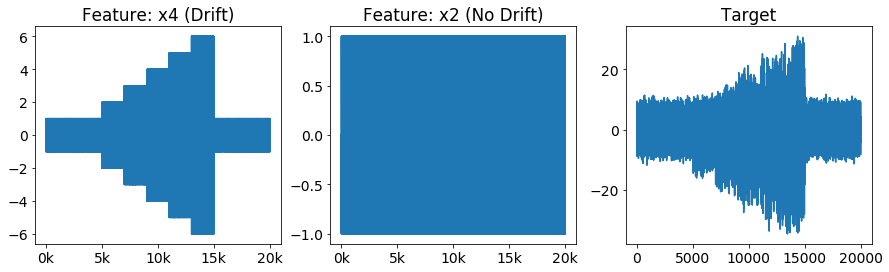

In [11]:
import matplotlib.ticker as ticker

#Plot features
font = {'size'   : 14}

plt.rc('font', **font)
fig, ax = plt.subplots(1, 3, figsize=(15,4))


ax[0].plot(data['x4'])
ax[0].set_title('Feature: x4 (Drift)')
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{}'.format(int(x/1000)) + 'k'))

ax[1].plot(data['x2'])
ax[1].set_title('Feature: x2 (No Drift)')
ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{}'.format(int(x/1000)) + 'k'))

ax[2].plot(data['y'])
ax[2].set_title('Target')
ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{}'.format(int(x/1000)) + 'k'))



plt.savefig('2dplanes_incremental.png', bbox_inches='tight', dpi=300)